<a href="https://colab.research.google.com/github/SidNegi/EDA_Assignment-/blob/main/eda_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y


In [2]:
# Shape of the dataset
data.shape

(7584, 10)

In [3]:
# Summary statistics for numerical columns
data.describe()


,rownames,Anger,id
count,7584.000000,7584.000000,7584.0000
mean,3792.500000,20.003165,158.5000
std,2189.456554,4.841139,91.2269
min,1.000000,11.000000,1.0000
25%,1896.750000,17.000000,79.7500
50%,3792.500000,19.000000,158.5000
75%,5688.250000,23.000000,237.2500
max,7584.000000,39.000000,316.0000


In [4]:
# Information about dataset (data types, missing values, etc.)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  7584 non-null   int64 
 1   Anger     7584 non-null   int64 
 2   Gender    7584 non-null   object
 3   item      7584 non-null   object
 4   resp      7584 non-null   object
 5   id        7584 non-null   int64 
 6   btype     7584 non-null   object
 7   situ      7584 non-null   object
 8   mode      7584 non-null   object
 9   r2        7584 non-null   object
dtypes: int64(3), object(7)
memory usage: 592.6+ KB


In [5]:
# Checking for missing values
data.isnull().sum()


,0
rownames,0
Anger,0
Gender,0
item,0
resp,0
id,0
btype,0
situ,0
mode,0
r2,0


In [7]:
# Summary of numerical columns
data.describe()

# Check the distribution of categorical variables
data['Gender'].value_counts()
data['btype'].value_counts()
data['situ'].value_counts()


,count
situ,
other,3792
self,3792


In [13]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Check for missing values in non-numeric columns
missing_values_non_numeric = data[non_numeric_columns].isnull().sum()
print("Missing values in non-numeric columns:\n", missing_values_non_numeric)

Missing values in non-numeric columns:
 Gender    0
item      0
resp      0
btype     0
situ      0
mode      0
r2        0
dtype: int64


## UNIVARIATE ANALYSIS

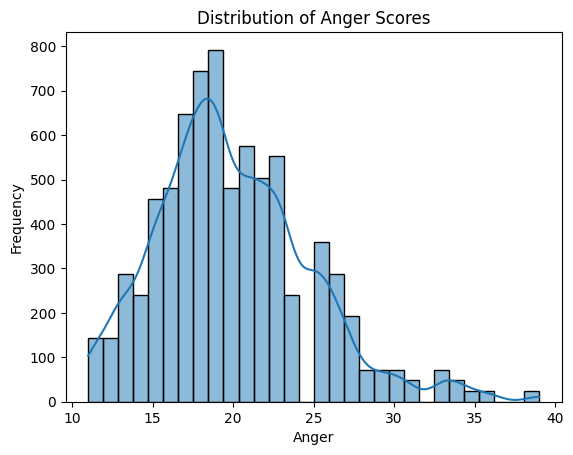

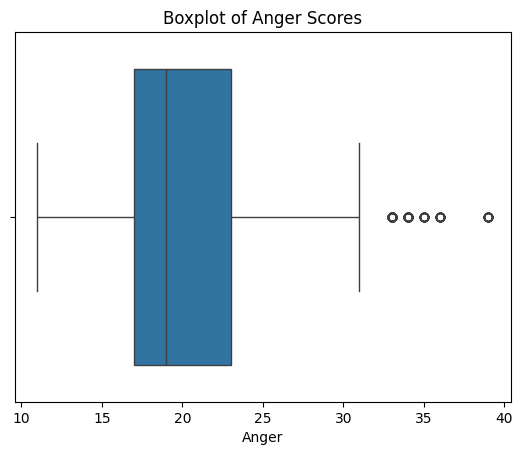

In [16]:
# Histogram with KDE
sns.histplot(data['Anger'], bins=30, kde=True)
plt.title('Distribution of Anger Scores')
plt.xlabel('Anger')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see spread and outliers
sns.boxplot(x=data['Anger'])
plt.title('Boxplot of Anger Scores')
plt.xlabel('Anger')
plt.show()


In [17]:
# Quantiles
anger_quantiles = data['Anger'].quantile([0.25, 0.5, 0.75])
print(anger_quantiles)


0.25    17.0
0.50    19.0
0.75    23.0
Name: Anger, dtype: float64


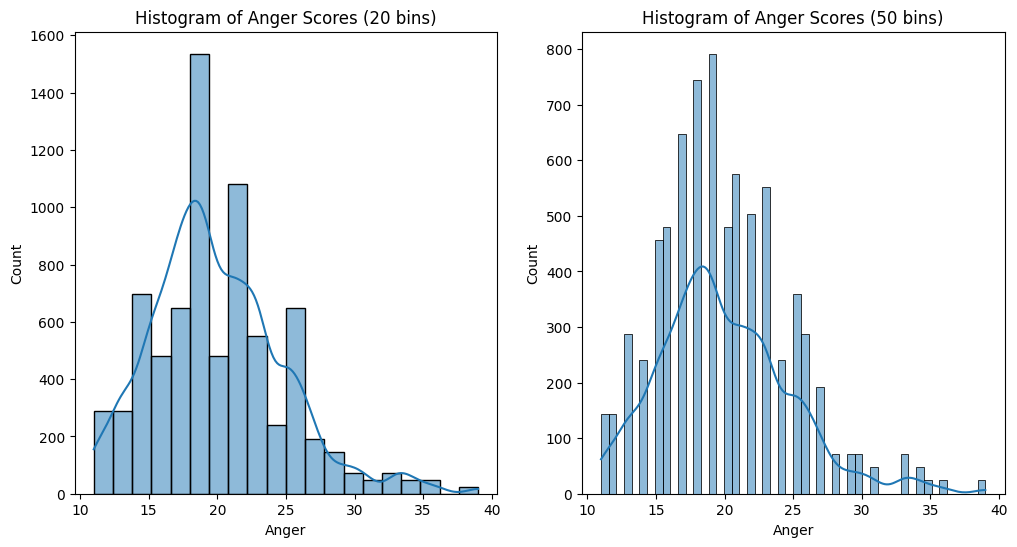

In [18]:
# Histogram with different bin sizes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Anger'], bins=20, kde=True)
plt.title('Histogram of Anger Scores (20 bins)')

plt.subplot(1, 2, 2)
sns.histplot(data['Anger'], bins=50, kde=True)
plt.title('Histogram of Anger Scores (50 bins)')

plt.show()


In [19]:
# Frequency counts
gender_counts = data['Gender'].value_counts()
print(gender_counts)


Gender
F    5832
M    1752
Name: count, dtype: int64


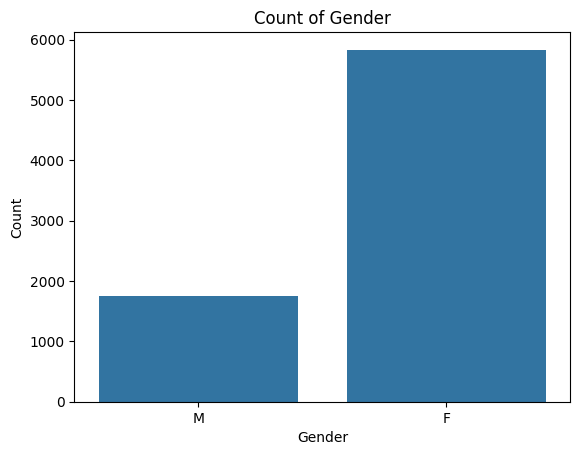

In [20]:
# Bar plot for Gender
sns.countplot(x='Gender', data=data)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [21]:
# Proportions
gender_proportions = data['Gender'].value_counts(normalize=True)
print(gender_proportions)


Gender
F    0.768987
M    0.231013
Name: proportion, dtype: float64


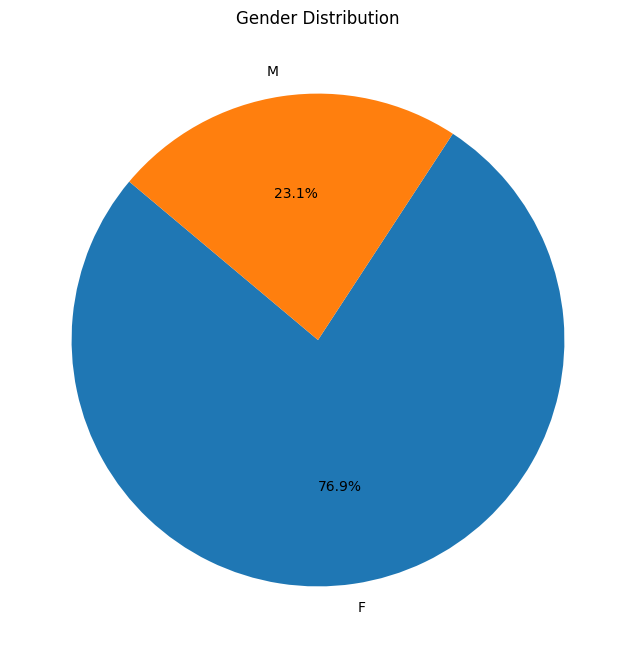

In [22]:
# Pie chart for Gender
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


btype
curse    2528
scold    2528
shout    2528
Name: count, dtype: int64


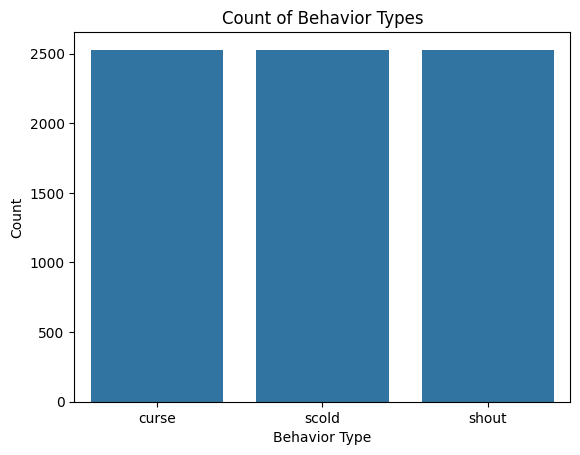

In [24]:
# Frequency counts
btype_counts = data['btype'].value_counts()
print(btype_counts)

# Bar plot
sns.countplot(x='btype', data=data)
plt.title('Count of Behavior Types')
plt.xlabel('Behavior Type')
plt.ylabel('Count')
plt.show()


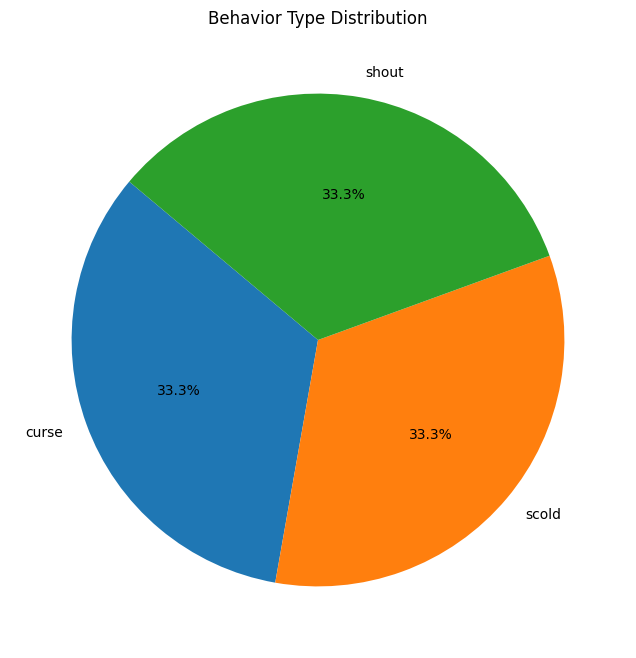

In [25]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(btype_counts, labels=btype_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Behavior Type Distribution')
plt.show()


situ
other    3792
self     3792
Name: count, dtype: int64


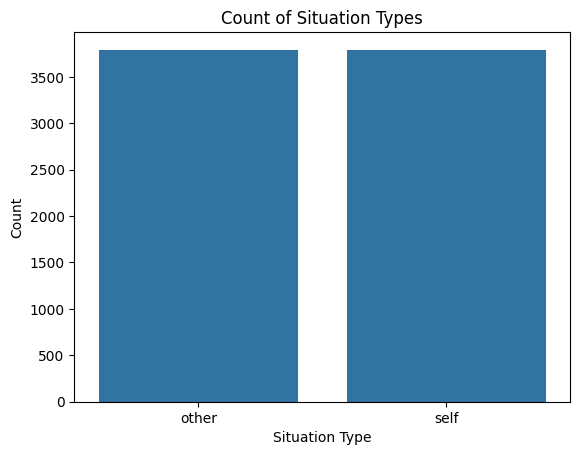

In [28]:
# Frequency counts
situ_counts = data['situ'].value_counts()
print(situ_counts)

# Bar plot
sns.countplot(x='situ', data=data)
plt.title('Count of Situation Types')
plt.xlabel('Situation Type')
plt.ylabel('Count')
plt.show()


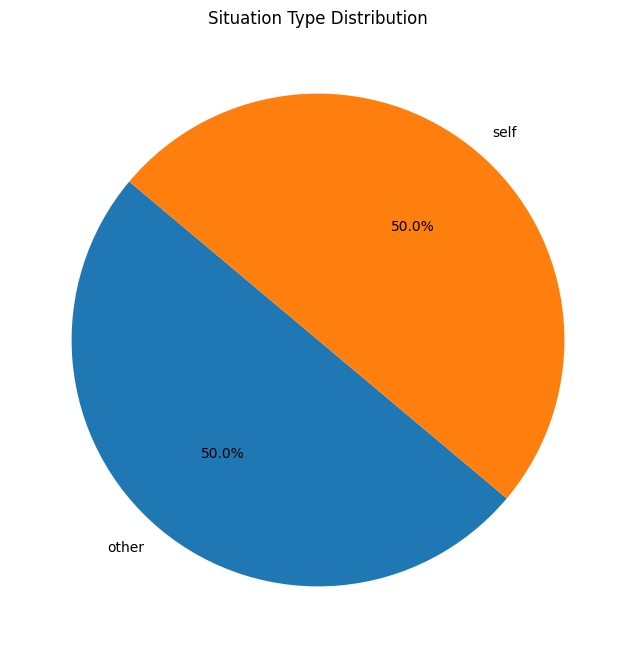

In [29]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(situ_counts, labels=situ_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Situation Type Distribution')
plt.show()

mode
want    3792
do      3792
Name: count, dtype: int64


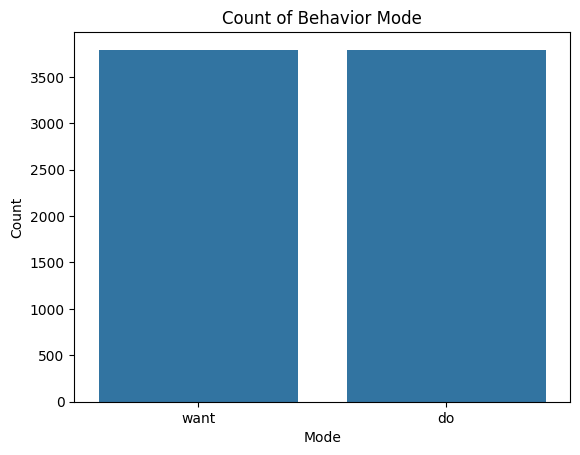

In [30]:
# Frequency counts
mode_counts = data['mode'].value_counts()
print(mode_counts)

# Bar plot
sns.countplot(x='mode', data=data)
plt.title('Count of Behavior Mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()



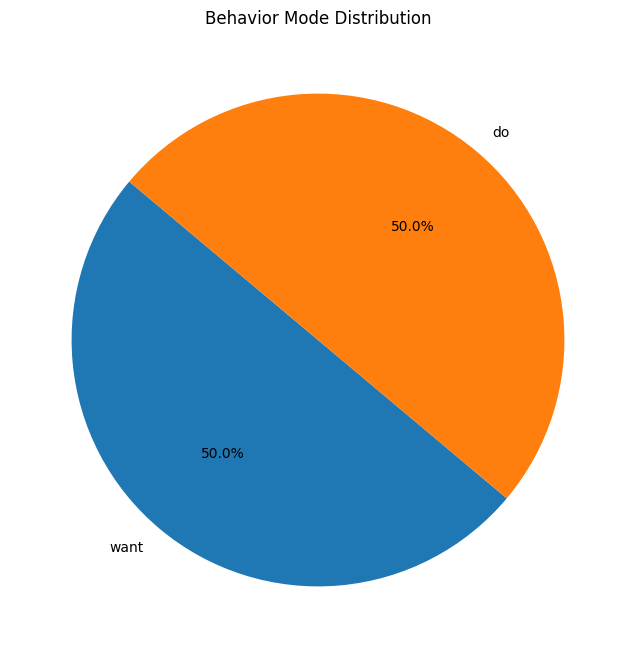

In [31]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Behavior Mode Distribution')
plt.show()


resp
no         3973
perhaps    2081
yes        1530
Name: count, dtype: int64


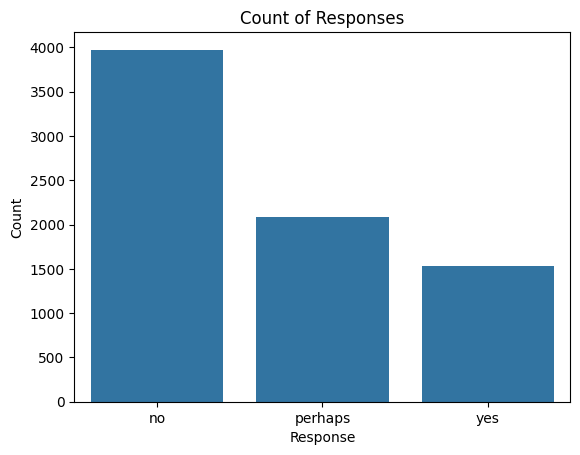

In [32]:
# Frequency counts
resp_counts = data['resp'].value_counts()
print(resp_counts)

# Bar plot
sns.countplot(x='resp', data=data)
plt.title('Count of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


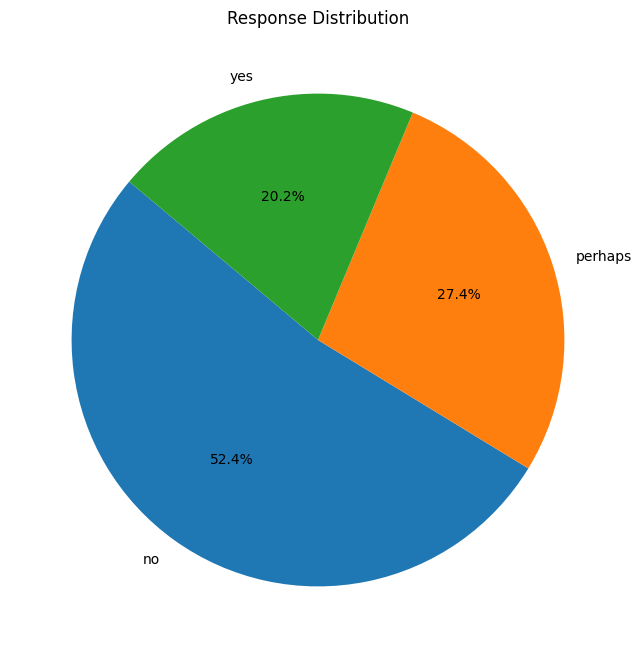

In [33]:

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(resp_counts, labels=resp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Response Distribution')
plt.show()


r2
N    3973
Y    3611
Name: count, dtype: int64


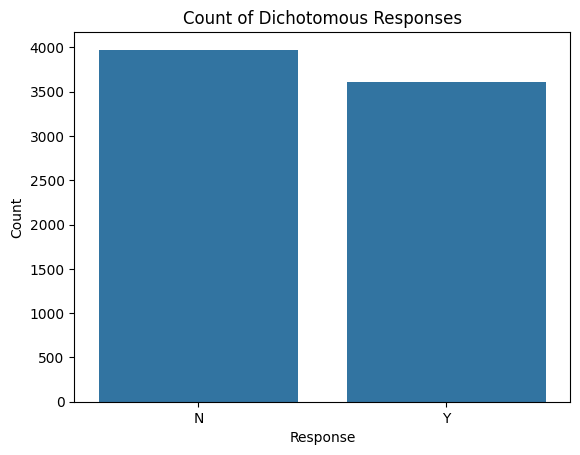

In [34]:
# Frequency counts
r2_counts = data['r2'].value_counts()
print(r2_counts)

# Bar plot
sns.countplot(x='r2', data=data)
plt.title('Count of Dichotomous Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


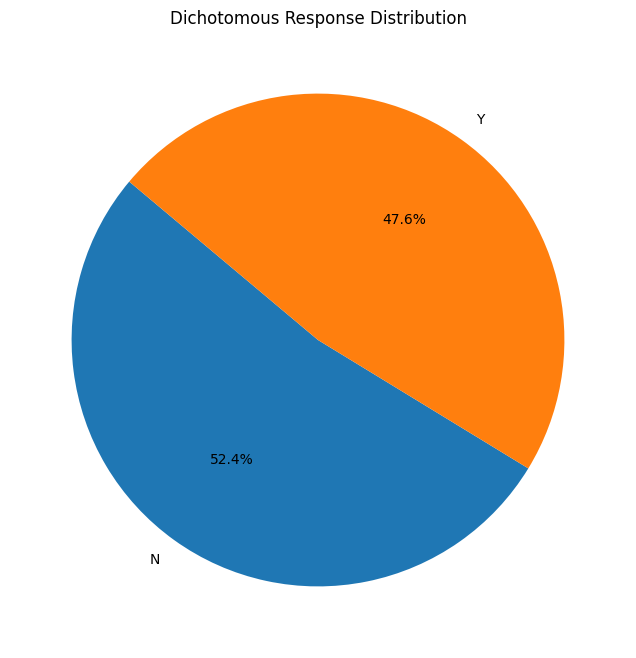

In [35]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(r2_counts, labels=r2_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dichotomous Response Distribution')
plt.show()


## BIVARIATE ANALYSIS
### numerical vs numerical (only anger field is there)

##  Categorical vs. Numerical

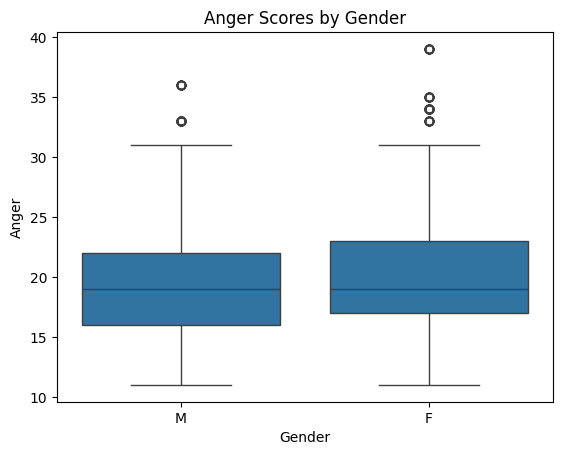

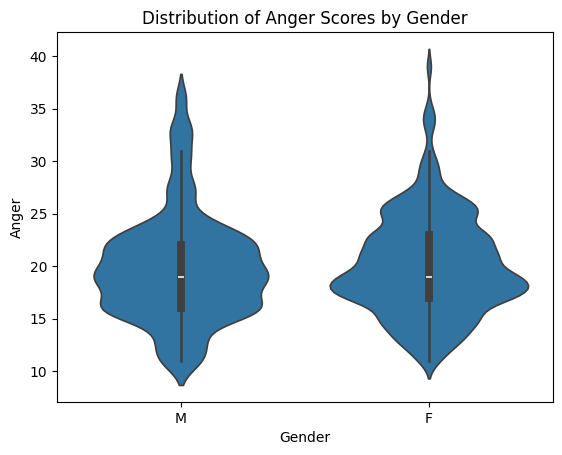

In [40]:
# Boxplot for Anger by Gender
sns.boxplot(x='Gender', y='Anger', data=data)
plt.title('Anger Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Anger')
plt.show()

# Violin plot for Anger by Gender
sns.violinplot(x='Gender', y='Anger', data=data)
plt.title('Distribution of Anger Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Anger')
plt.show()

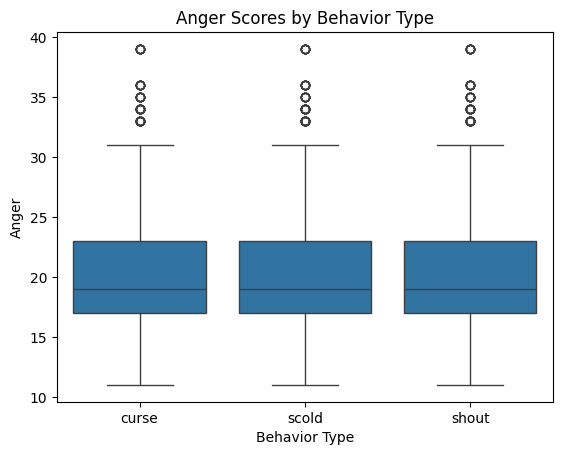

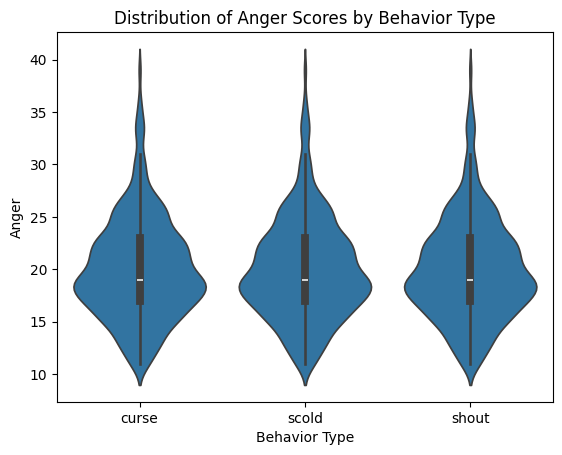

In [41]:
# Boxplot for Anger by Behavior Type
sns.boxplot(x='btype', y='Anger', data=data)
plt.title('Anger Scores by Behavior Type')
plt.xlabel('Behavior Type')
plt.ylabel('Anger')
plt.show()

# Violin plot for Anger by Behavior Type
sns.violinplot(x='btype', y='Anger', data=data)
plt.title('Distribution of Anger Scores by Behavior Type')
plt.xlabel('Behavior Type')
plt.ylabel('Anger')
plt.show()


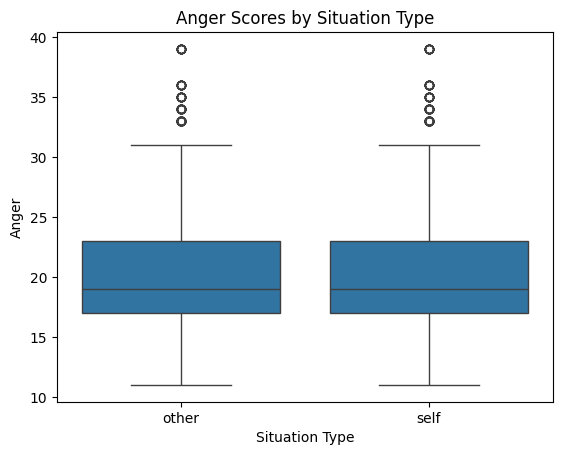

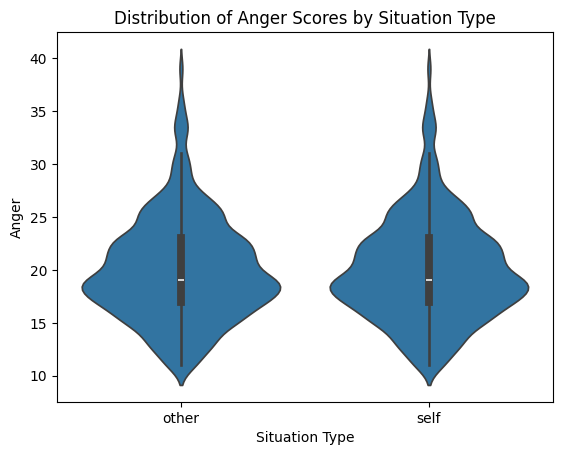

In [42]:
# Boxplot for Anger by Situation Type
sns.boxplot(x='situ', y='Anger', data=data)
plt.title('Anger Scores by Situation Type')
plt.xlabel('Situation Type')
plt.ylabel('Anger')
plt.show()

# Violin plot for Anger by Situation Type
sns.violinplot(x='situ', y='Anger', data=data)
plt.title('Distribution of Anger Scores by Situation Type')
plt.xlabel('Situation Type')
plt.ylabel('Anger')
plt.show()


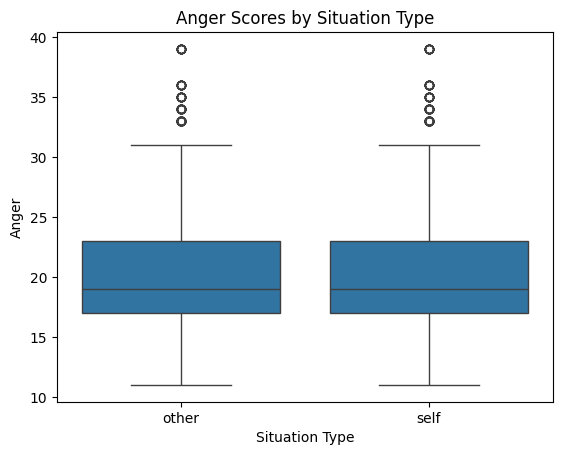

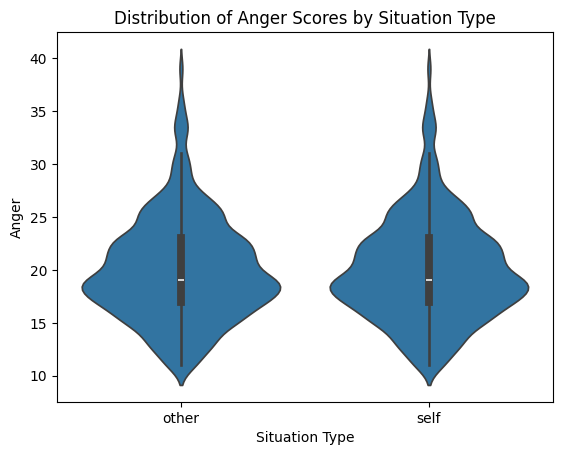

In [43]:
# Boxplot for Anger by Situation Type
sns.boxplot(x='situ', y='Anger', data=data)
plt.title('Anger Scores by Situation Type')
plt.xlabel('Situation Type')
plt.ylabel('Anger')
plt.show()

# Violin plot for Anger by Situation Type
sns.violinplot(x='situ', y='Anger', data=data)
plt.title('Distribution of Anger Scores by Situation Type')
plt.xlabel('Situation Type')
plt.ylabel('Anger')
plt.show()


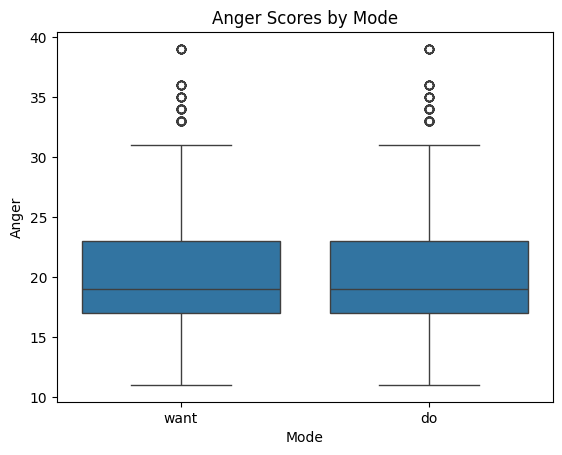

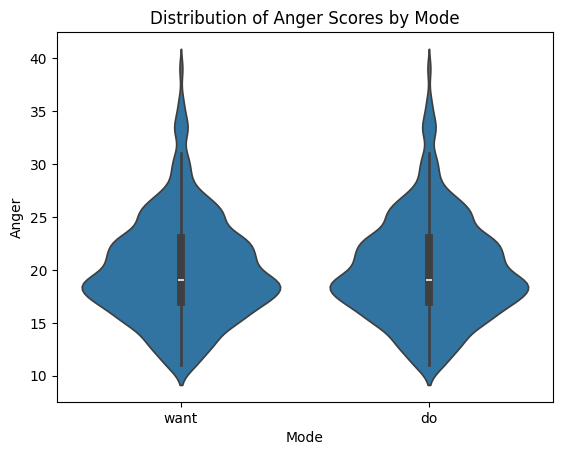

In [44]:
# Boxplot for Anger by Mode
sns.boxplot(x='mode', y='Anger', data=data)
plt.title('Anger Scores by Mode')
plt.xlabel('Mode')
plt.ylabel('Anger')
plt.show()

# Violin plot for Anger by Mode
sns.violinplot(x='mode', y='Anger', data=data)
plt.title('Distribution of Anger Scores by Mode')
plt.xlabel('Mode')
plt.ylabel('Anger')
plt.show()


In [45]:
# Summary statistics for Anger by Gender
gender_anger_summary = data.groupby('Gender')['Anger'].describe()
print(gender_anger_summary)


         count       mean       std   min   25%   50%   75%   max
Gender                                                           
F       5832.0  20.053498  4.752840  11.0  17.0  19.0  23.0  39.0
M       1752.0  19.835616  5.121965  11.0  16.0  19.0  22.0  36.0


In [46]:
# Summary statistics for Anger by Behavior Type
btype_anger_summary = data.groupby('btype')['Anger'].describe()
print(btype_anger_summary)


        count       mean       std   min   25%   50%   75%   max
btype                                                           
curse  2528.0  20.003165  4.841777  11.0  17.0  19.0  23.0  39.0
scold  2528.0  20.003165  4.841777  11.0  17.0  19.0  23.0  39.0
shout  2528.0  20.003165  4.841777  11.0  17.0  19.0  23.0  39.0


In [47]:
# Summary statistics for Anger by Situation Type
situ_anger_summary = data.groupby('situ')['Anger'].describe()
print(situ_anger_summary)


        count       mean       std   min   25%   50%   75%   max
situ                                                            
other  3792.0  20.003165  4.841458  11.0  17.0  19.0  23.0  39.0
self   3792.0  20.003165  4.841458  11.0  17.0  19.0  23.0  39.0


In [48]:
# Summary statistics for Anger by Mode
mode_anger_summary = data.groupby('mode')['Anger'].describe()
print(mode_anger_summary)


       count       mean       std   min   25%   50%   75%   max
mode                                                           
do    3792.0  20.003165  4.841458  11.0  17.0  19.0  23.0  39.0
want  3792.0  20.003165  4.841458  11.0  17.0  19.0  23.0  39.0


## Categorical vs Categorical


btype   curse  scold  shout
Gender                     
F        1944   1944   1944
M         584    584    584


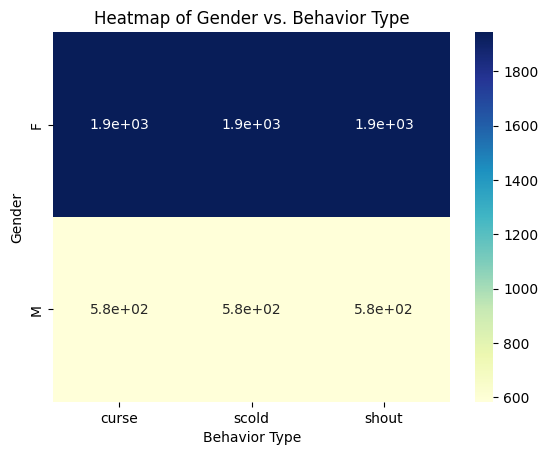

In [49]:
# Cross tabulation
gender_btype_ct = pd.crosstab(data['Gender'], data['btype'])
print(gender_btype_ct)

# Heatmap
sns.heatmap(gender_btype_ct, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Gender vs. Behavior Type')
plt.xlabel('Behavior Type')
plt.ylabel('Gender')
plt.show()


situ    other  self
Gender             
F        2916  2916
M         876   876


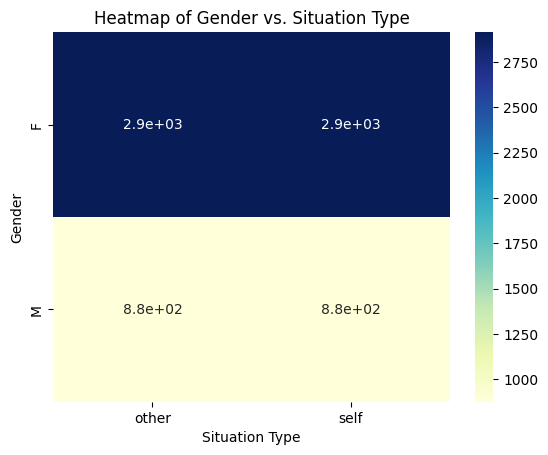

In [50]:
# Cross tabulation
gender_situ_ct = pd.crosstab(data['Gender'], data['situ'])
print(gender_situ_ct)

# Heatmap
sns.heatmap(gender_situ_ct, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Gender vs. Situation Type')
plt.xlabel('Situation Type')
plt.ylabel('Gender')
plt.show()


situ   other  self
btype             
curse   1264  1264
scold   1264  1264
shout   1264  1264


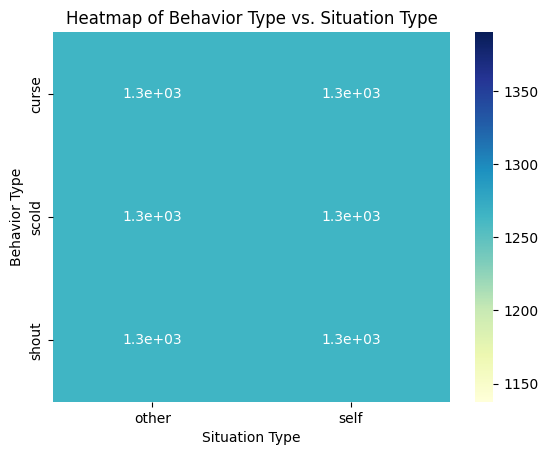

In [51]:
# Cross tabulation
btype_situ_ct = pd.crosstab(data['btype'], data['situ'])
print(btype_situ_ct)

# Heatmap
sns.heatmap(btype_situ_ct, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Behavior Type vs. Situation Type')
plt.xlabel('Situation Type')
plt.ylabel('Behavior Type')
plt.show()


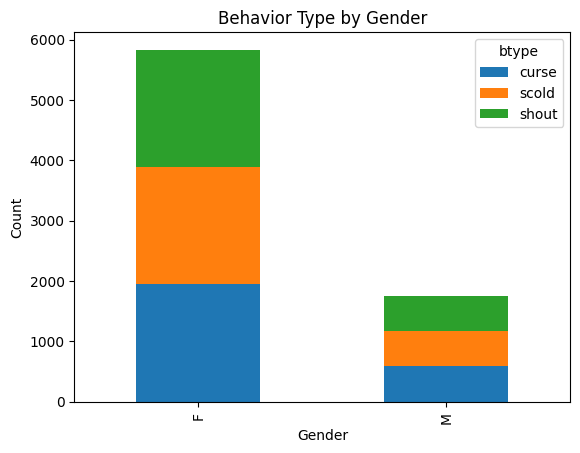

In [52]:
# Stacked bar plot
gender_btype_counts = pd.crosstab(data['Gender'], data['btype'])
gender_btype_counts.plot(kind='bar', stacked=True)
plt.title('Behavior Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


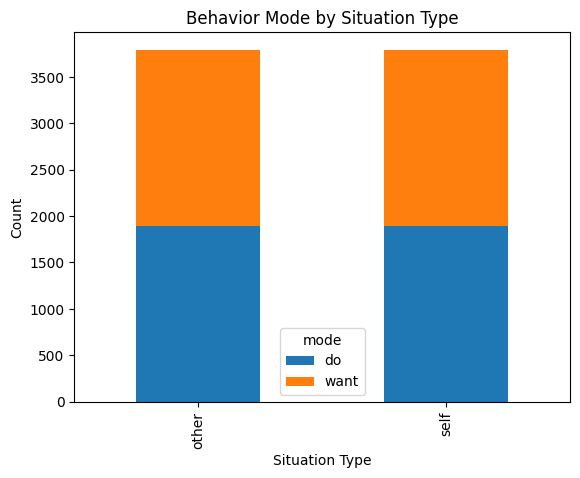

In [53]:
# Stacked bar plot
situ_mode_counts = pd.crosstab(data['situ'], data['mode'])
situ_mode_counts.plot(kind='bar', stacked=True)
plt.title('Behavior Mode by Situation Type')
plt.xlabel('Situation Type')
plt.ylabel('Count')
plt.show()


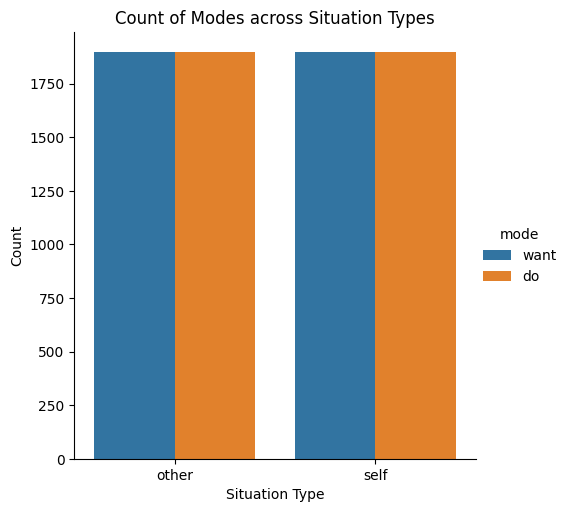

In [56]:
# Interaction plot for Situation Type and Mode
sns.catplot(x='situ', hue='mode', kind='count', data=data)
plt.title('Count of Modes across Situation Types')
plt.xlabel('Situation Type')
plt.ylabel('Count')
plt.show()


## Multivariate analysis

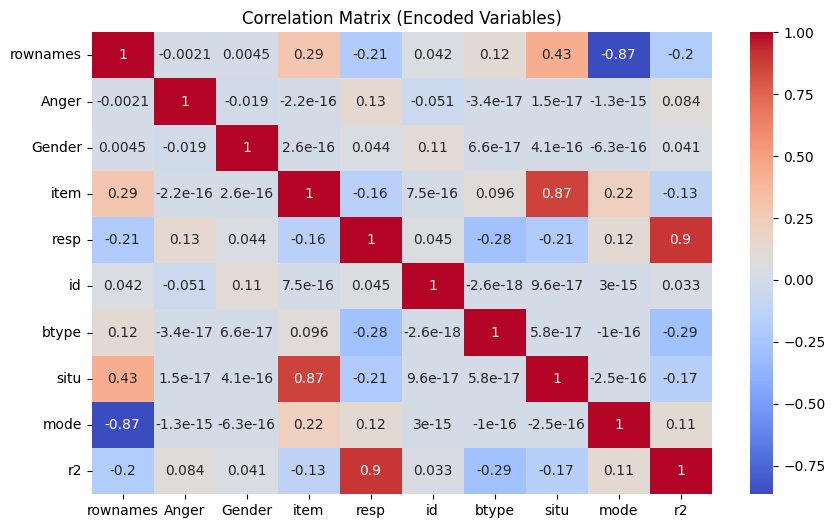

In [79]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe to encode categorical columns
encoded_df = df.copy()

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
categorical_columns = ['Gender', 'item', 'resp', 'btype', 'situ', 'mode', 'r2']

for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

plt.figure(figsize=(10, 6))
correlation_matrix = encoded_df.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Create the heatmap
plt.title("Correlation Matrix (Encoded Variables)")
plt.show()


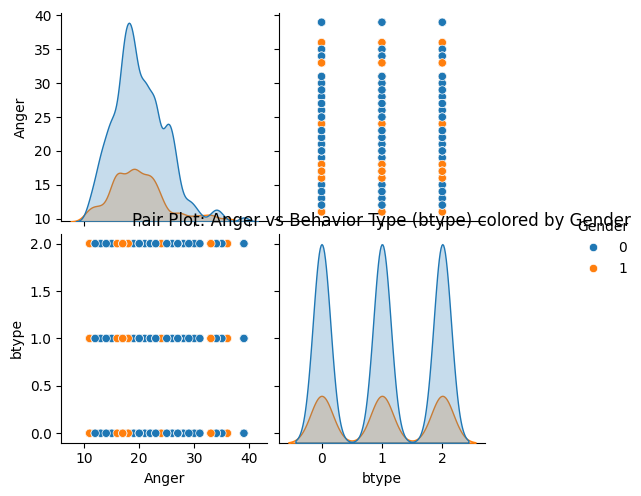

In [87]:

# Pair plot between 'Anger' and 'btype', colored by 'Gender'
sns.pairplot(encoded_df, vars=['Anger', 'btype'], hue='Gender')
plt.title('Pair Plot: Anger vs Behavior Type (btype) colored by Gender')
plt.show()


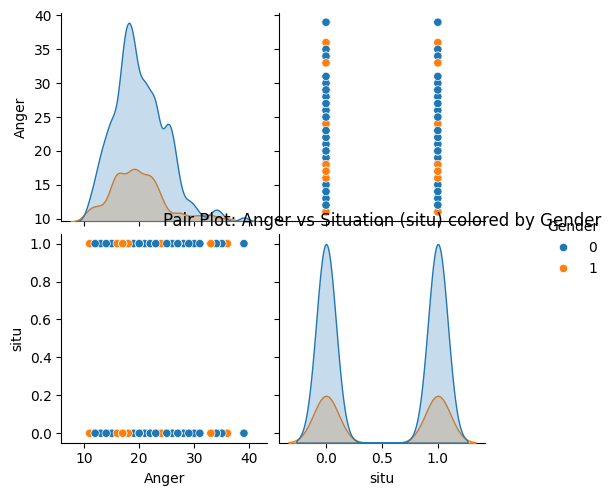

In [88]:
# Pair plot between 'Anger' and 'situ', colored by 'Gender'
sns.pairplot(encoded_df, vars=['Anger', 'situ'], hue='Gender')
plt.title('Pair Plot: Anger vs Situation (situ) colored by Gender')
plt.show()


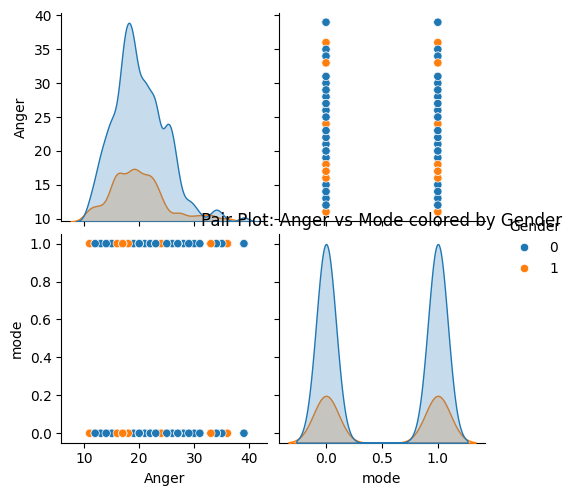

In [89]:
# Pair plot between 'Anger' and 'mode', colored by 'Gender'
sns.pairplot(encoded_df, vars=['Anger', 'mode'], hue='Gender')
plt.title('Pair Plot: Anger vs Mode colored by Gender')
plt.show()


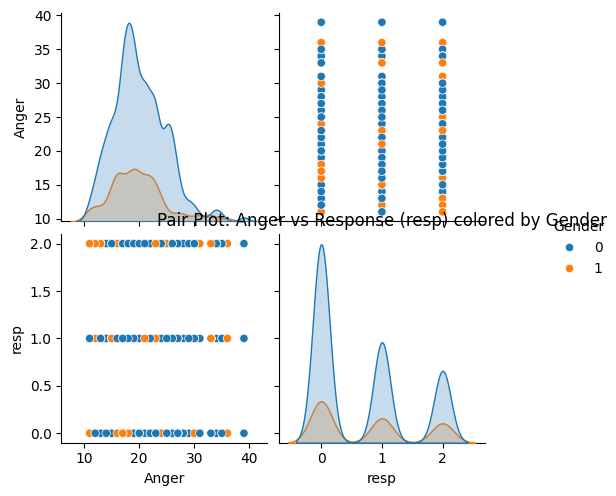

In [90]:
# Pair plot between 'Anger' and 'resp', colored by 'Gender'
sns.pairplot(encoded_df, vars=['Anger', 'resp'], hue='Gender')
plt.title('Pair Plot: Anger vs Response (resp) colored by Gender')
plt.show()
